In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
df = pd.read_csv('BankChurners.csv')

In [3]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


# 1. EDA

In [60]:
df = df.drop(columns = [df.columns[21], df.columns[22]], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

- categorical: CLIENTNUM, **Attrition_Flag(binary, target)**, Gender(binary), Education_Level, Maritul_Status, Income_Category, Card_Category
- numerical: the other

- no missing values

In [10]:
for i in df.columns:
    print(i, '\n', df[i].unique(), '\n')

CLIENTNUM 
 [768805383 818770008 713982108 ... 716506083 717406983 714337233] 

Attrition_Flag 
 ['Existing Customer' 'Attrited Customer'] 

Customer_Age 
 [45 49 51 40 44 32 37 48 42 65 56 35 57 41 61 47 62 54 59 63 53 58 55 66
 50 38 46 52 39 43 64 68 67 60 73 70 36 34 33 26 31 29 30 28 27] 

Gender 
 ['M' 'F'] 

Dependent_count 
 [3 5 4 2 0 1] 

Education_Level 
 ['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate'] 

Marital_Status 
 ['Married' 'Single' 'Unknown' 'Divorced'] 

Income_Category 
 ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown'] 

Card_Category 
 ['Blue' 'Gold' 'Silver' 'Platinum'] 

Months_on_book 
 [39 44 36 34 21 46 27 31 54 30 48 37 56 42 49 33 28 38 41 43 45 52 40 50
 35 47 32 20 29 25 53 24 55 23 22 26 13 51 19 15 17 18 16 14] 

Total_Relationship_Count 
 [5 6 4 3 2 1] 

Months_Inactive_12_mon 
 [1 4 2 3 6 0 5] 

Contacts_Count_12_mon 
 [3 2 0 1 4 5 6] 

Credit_Limit 
 [12691.  8256.  3418. ...

In [17]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


- There are differences between the units of the numerical attributes. Scaling might be helpful

### 1) Label Ratio

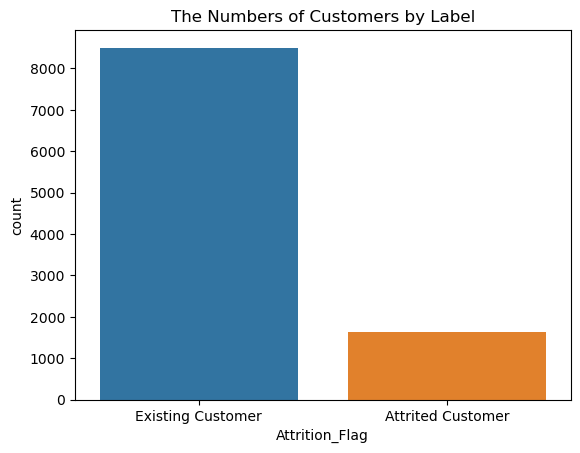

In [16]:
sns.countplot(x='Attrition_Flag', data=df)
plt.title('The Numbers of Customers by Label')
plt.show()

- The data is biased toward existing customer since the number of attrited customer is much smaller. --> Oversampling?

### 2) Categorical Attributes

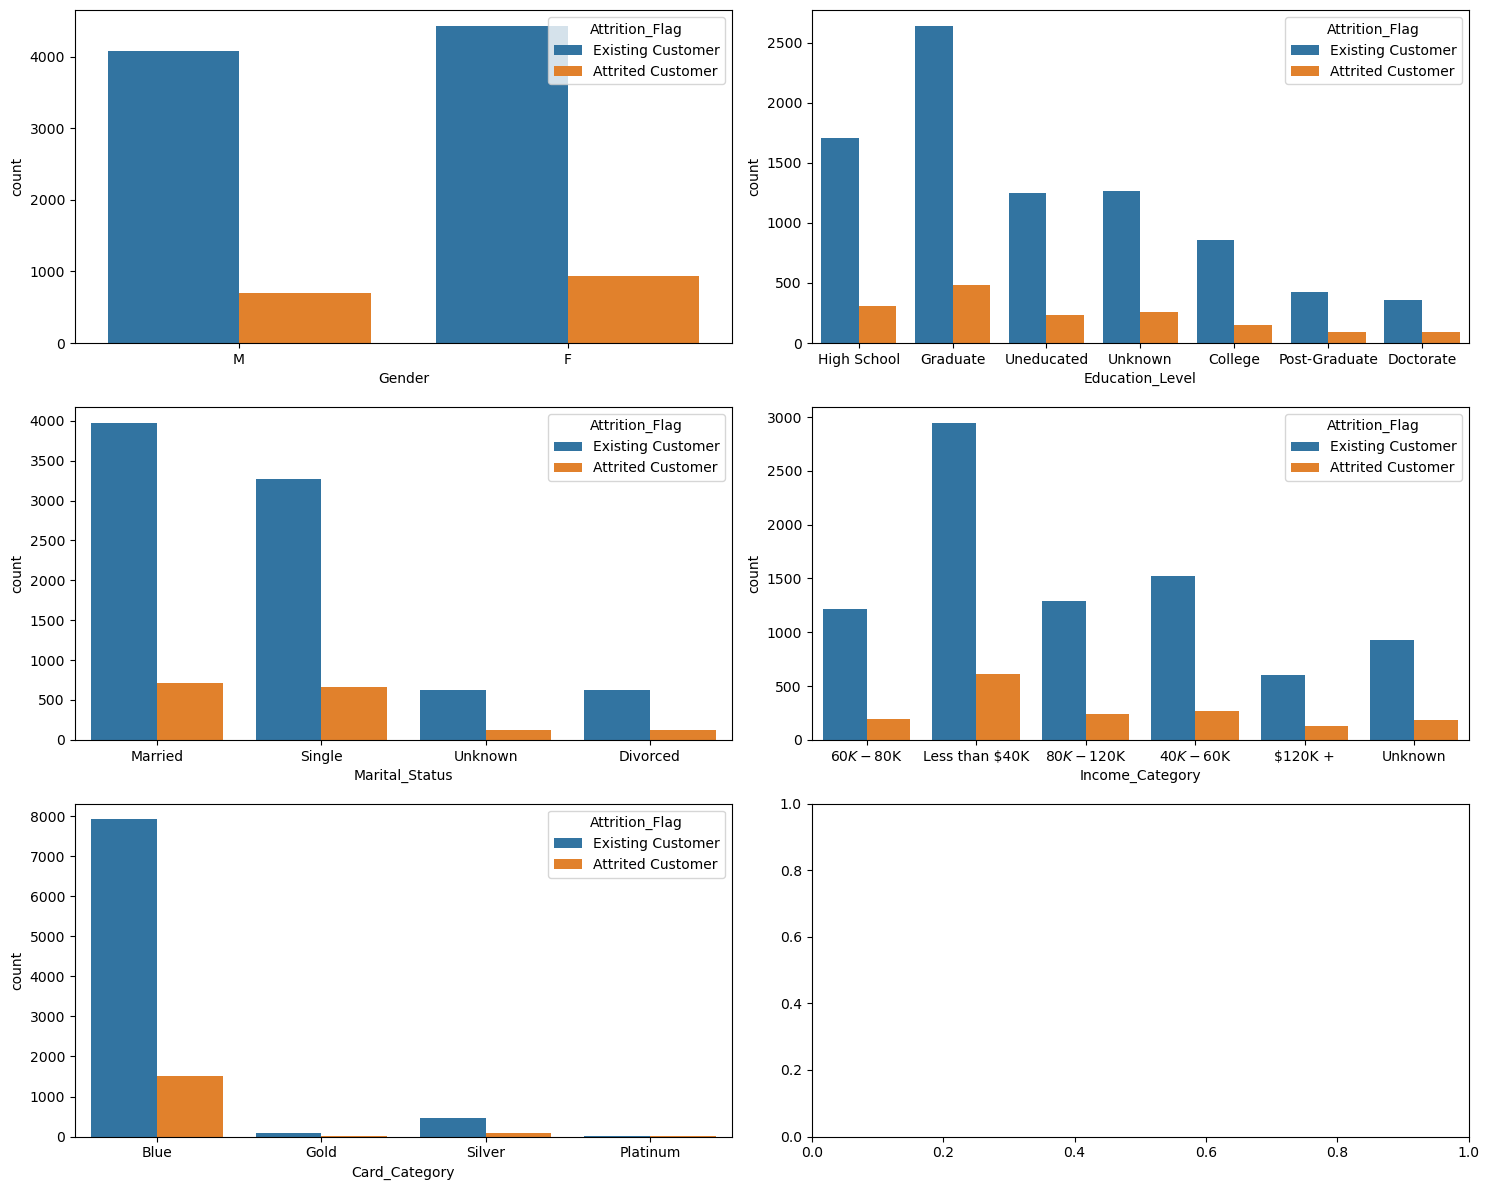

In [35]:
rows = 3
cols = 2
fig, axes = plt.subplots(rows, cols, figsize=(15, 12))
for i, col in enumerate(df.select_dtypes(include=['object']).columns[1:]):
    sns.countplot(data=df, x=col, ax=axes[int(i/cols),int(i%cols)], hue='Attrition_Flag')

plt.tight_layout()
plt.show()

### 3) The Distribution of Numerical Attributes

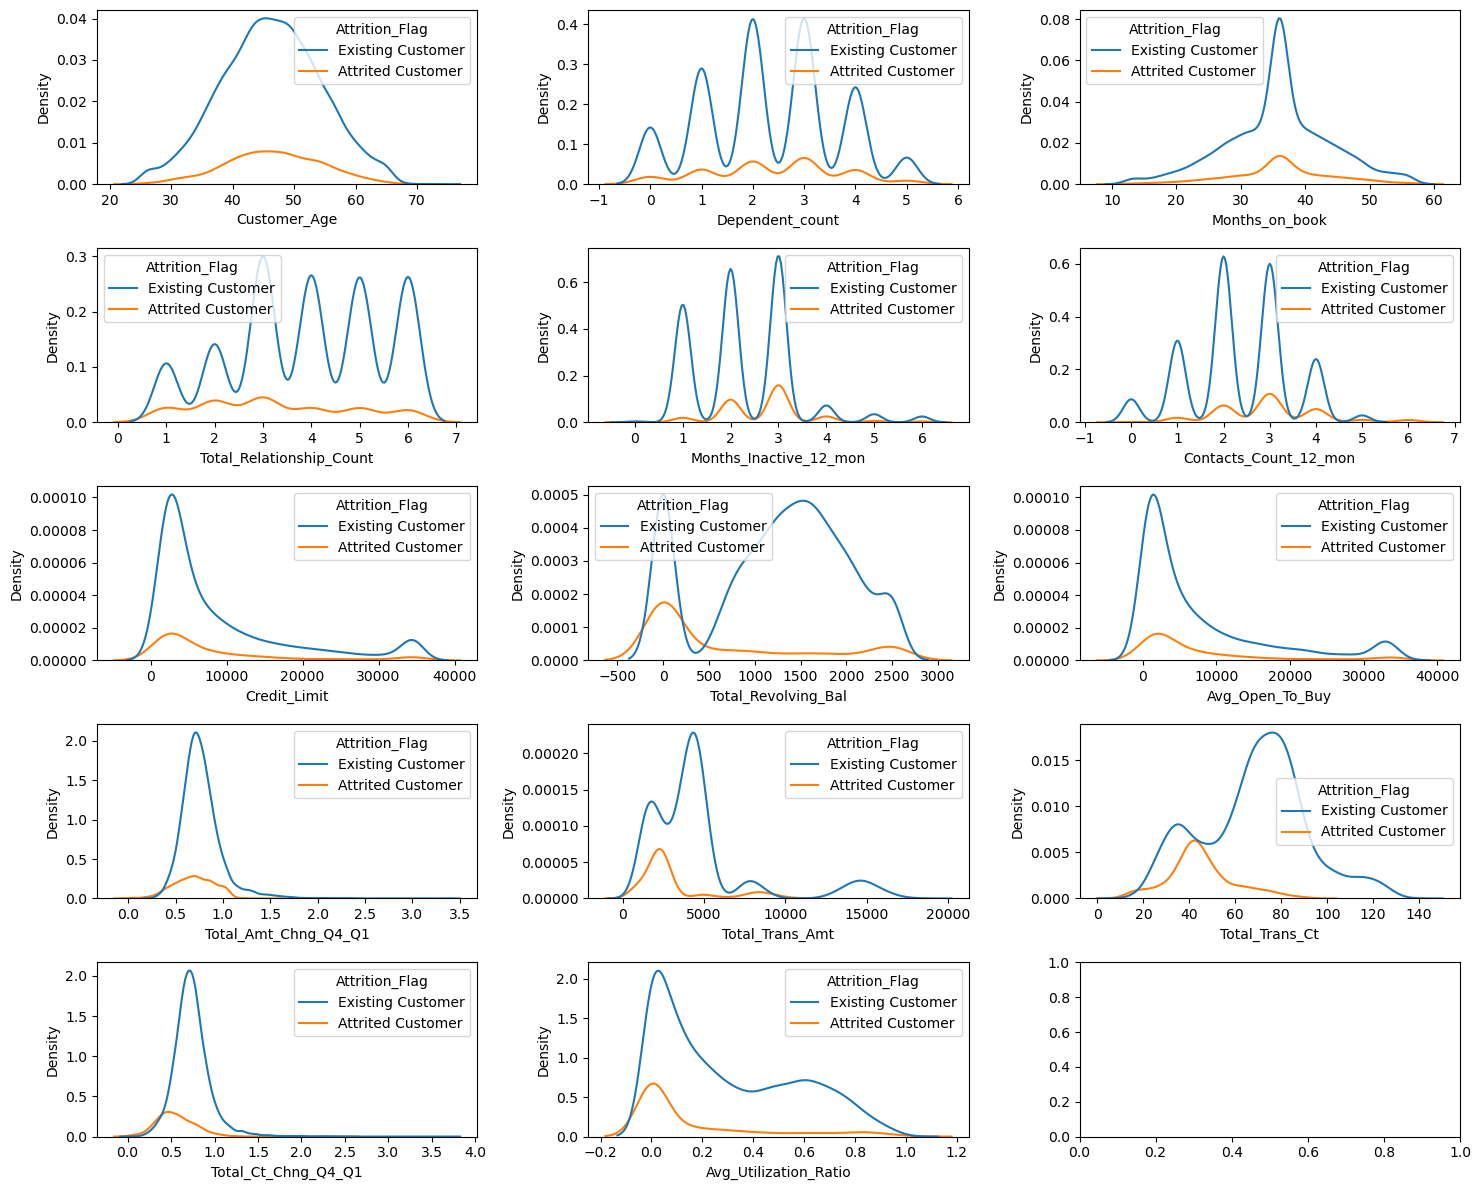

In [38]:
rows = 5
cols = 3

fig, axes = plt.subplots(rows, cols, figsize=(15, 12))
for i, col in enumerate(df.select_dtypes(exclude=['object']).columns[1:]):
    sns.kdeplot(data=df, x=col, ax=axes[int(i/cols),int(i%cols)], hue='Attrition_Flag')

plt.tight_layout()
plt.show()

- Standard scaling seems to be more effective than min-max scaling since it can generally yield stable results regardless of the distribution of the data.

## 2. Preprocessing

In [61]:
df = df.drop('CLIENTNUM', axis=1)  # 고객 번호는 삭제했음

### 1) Scaling

In [66]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numeric = df.select_dtypes(exclude='object')
scaled = scaler.fit_transform(numeric)

scaled = pd.DataFrame(scaled, columns=numeric.columns)
print(scaled)

       Customer_Age  Dependent_count  Months_on_book  \
0         -0.165406         0.503368        0.384621   
1          0.333570         2.043199        1.010715   
2          0.583058         0.503368        0.008965   
3         -0.789126         1.273283       -0.241473   
4         -0.789126         0.503368       -1.869317   
...             ...              ...             ...   
10122      0.458314        -0.266547        0.509840   
10123     -0.664382        -0.266547       -1.368442   
10124     -0.290150        -1.036462        0.008965   
10125     -2.036565        -0.266547        0.008965   
10126     -0.414894        -0.266547       -1.368442   

       Total_Relationship_Count  Months_Inactive_12_mon  \
0                      0.763943               -1.327136   
1                      1.407306               -1.327136   
2                      0.120579               -1.327136   
3                     -0.522785                1.641478   
4                      0.763943 

### 2) Label Encoding

In [104]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}

cat = df.select_dtypes('object').iloc[:, 1:]
for column in cat.columns:
    le = LabelEncoder()
    cat[column] = le.fit_transform(cat[column])
    label_encoders[column] = le
    
print(cat)

       Gender  Education_Level  Marital_Status  Income_Category  Card_Category
0           1                3               1                2              0
1           0                2               2                4              0
2           1                2               1                3              0
3           0                3               3                4              0
4           1                5               1                2              0
...       ...              ...             ...              ...            ...
10122       1                2               2                1              0
10123       1                6               0                1              0
10124       0                3               1                4              0
10125       1                2               3                1              0
10126       0                2               1                4              3

[10127 rows x 5 columns]


In [105]:
df['Attrition_Flag'] = df['Attrition_Flag'].apply(lambda x: 1 if x == 'Attrited Customer' else 0)

- Attrited Customer이면 1, Existing Customer이면 0으로 변환

In [110]:
# Concatenate back into one dataframe

processed = pd.concat([scaled, cat, df[['Attrition_Flag']]], axis=1)
processed

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Attrition_Flag
0,-0.165406,0.503368,0.384621,0.763943,-1.327136,0.492404,0.446622,-0.473422,0.488971,2.623494,-0.959707,-0.973895,3.834003,-0.775882,1,3,1,2,0,0
1,0.333570,2.043199,1.010715,1.407306,-1.327136,-0.411616,-0.041367,-0.366667,-0.008486,3.563293,-0.916433,-1.357340,12.608573,-0.616276,0,2,2,4,0,0
2,0.583058,0.503368,0.008965,0.120579,-1.327136,-2.219655,-0.573698,-1.426858,-0.445658,8.367214,-0.740982,-1.911206,6.807864,-0.997155,1,2,1,3,0,0
3,-0.789126,1.273283,-0.241473,-0.522785,1.641478,-1.315636,-0.585251,1.661686,-0.734100,2.942843,-0.951758,-1.911206,6.807864,1.759686,0,3,3,4,0,0
4,-0.789126,0.503368,-1.869317,0.763943,-1.327136,-2.219655,-0.430877,-1.426858,-0.302868,6.455682,-1.056263,-1.570365,7.509325,-0.997155,1,5,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0.458314,-0.266547,0.509840,-0.522785,-0.337598,0.492404,-0.509330,0.844455,-0.584929,-0.259771,3.259358,2.221481,0.608119,0.678714,1,2,2,1,0,0
10123,-0.664382,-0.266547,-1.368442,0.120579,-0.337598,0.492404,-0.479181,1.255524,-0.591639,0.201004,1.283475,0.176440,-0.122745,0.856458,1,6,0,1,0,1
10124,-0.290150,-1.036462,0.008965,0.763943,0.651940,1.396424,-0.354626,-1.426858,-0.226632,0.269436,1.732994,-0.207005,0.444305,-0.997155,0,3,1,4,0,1
10125,-2.036565,-0.266547,0.008965,0.120579,0.651940,0.492404,-0.368710,-1.426858,-0.240713,-1.026208,1.174848,-0.121795,0.041070,-0.997155,1,2,3,1,0,1


## 3. Prediction

In [111]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = processed.iloc[:, :-1]
y = processed['Attrition_Flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Oversampling

In [112]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
y_train_smote.value_counts()

0    6387
1    6387
Name: Attrition_Flag, dtype: int64

### 1) Random Forest

In [113]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

#### Evaluation

In [116]:
def evaluation(y_true, y_pred):
    print('accuracy_score:', round(accuracy_score(y_true, y_pred), 3))
    print('recall_score:', round(recall_score(y_true, y_pred), 3))
    print('precision_score:', round(precision_score(y_true, y_pred), 3))
    print('roc_auc_score',round(roc_auc_score(y_true, y_pred), 3))
    print('confusion_matrix\n', confusion_matrix(y_true, y_pred))

In [117]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, confusion_matrix


y_pred = rf.predict(X_test)
evaluation(y_test, y_pred)

accuracy_score: 0.962
recall_score: 0.885
precision_score: 0.888
roc_auc_score 0.932
confusion_matrix
 [[2066   47]
 [  48  371]]


### 2) Adaboost

In [121]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train_smote, y_train_smote)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [122]:
y_pred = ada.predict(X_test)
evaluation(y_test, y_pred)

accuracy_score: 0.955
recall_score: 0.9
precision_score: 0.838
roc_auc_score 0.933
confusion_matrix
 [[2040   73]
 [  42  377]]


### 3) XGBoost

In [133]:
import xgboost as xgb

X_train, X_valid, y_train, y_valid = train_test_split(X_train_smote, y_train_smote, test_size=0.33, random_state=42)

dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_valid, label=y_valid)

In [134]:
params = {
    'objective': 'binary:logistic',
    'max_depth': 10
}

xgboost = xgb.train(params, dtrain, num_boost_round=100, evals=[(dvalid, 'validation')])

[0]	validation-logloss:0.48058
[1]	validation-logloss:0.36124
[2]	validation-logloss:0.28285
[3]	validation-logloss:0.22867
[4]	validation-logloss:0.18925
[5]	validation-logloss:0.16298
[6]	validation-logloss:0.14207
[7]	validation-logloss:0.12720
[8]	validation-logloss:0.11521
[9]	validation-logloss:0.10535
[10]	validation-logloss:0.09712
[11]	validation-logloss:0.09161
[12]	validation-logloss:0.08696
[13]	validation-logloss:0.08093
[14]	validation-logloss:0.07700
[15]	validation-logloss:0.07373
[16]	validation-logloss:0.07188
[17]	validation-logloss:0.06956
[18]	validation-logloss:0.06730
[19]	validation-logloss:0.06616
[20]	validation-logloss:0.06407
[21]	validation-logloss:0.06345
[22]	validation-logloss:0.06225
[23]	validation-logloss:0.06002
[24]	validation-logloss:0.05916
[25]	validation-logloss:0.05795
[26]	validation-logloss:0.05745
[27]	validation-logloss:0.05661
[28]	validation-logloss:0.05616
[29]	validation-logloss:0.05534
[30]	validation-logloss:0.05503
[31]	validation-lo

In [140]:
dtest = xgb.DMatrix(X_test)
predictions = xgboost.predict(dtest)
y_pred = np.where(predictions > 0.5, 1 , 0)

evaluation(y_test, y_pred)

accuracy_score: 0.966
recall_score: 0.907
precision_score: 0.892
roc_auc_score 0.943
confusion_matrix
 [[2067   46]
 [  39  380]]
